![image](competi.png)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.svm import SVR
import sklearn.neural_network
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [43]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("diamonds_train.csv", index_col=0)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40345 entries, 0 to 40344
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40345 non-null  float64
 1   cut      40345 non-null  object 
 2   color    40345 non-null  object 
 3   clarity  40345 non-null  object 
 4   depth    40345 non-null  float64
 5   table    40345 non-null  float64
 6   x        40345 non-null  float64
 7   y        40345 non-null  float64
 8   z        40345 non-null  float64
 9   price    40345 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


In [45]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,Ideal,H,VS2,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,Very Good,D,VVS2,64.0,56.0,4.14,4.17,2.66,532
2,0.42,Premium,F,VS1,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,Ideal,H,IF,61.1,57.0,4.16,4.12,2.53,600
4,1.10,Good,G,SI1,63.4,57.0,6.52,6.55,4.14,4997


<AxesSubplot:xlabel='price', ylabel='Count'>

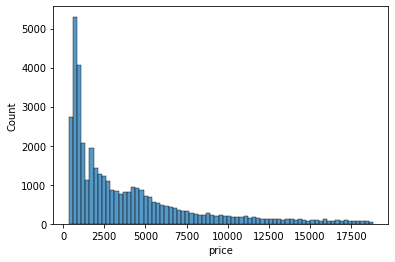

In [46]:
sns.histplot(data=df['price'])

Text(0.5, 0, 'table')

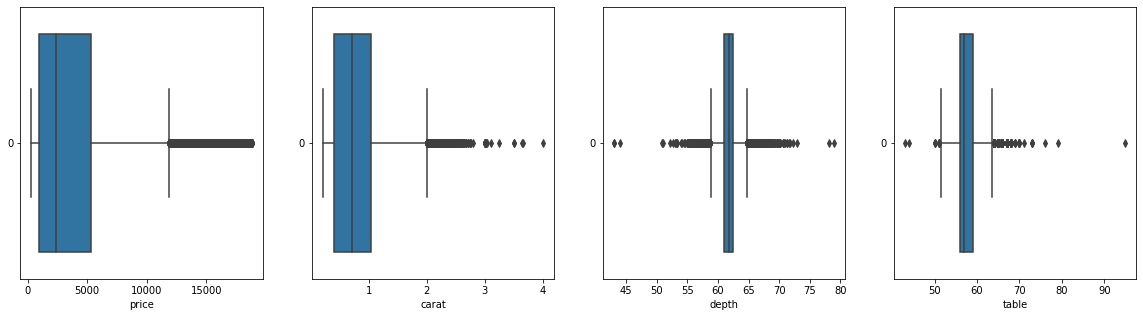

In [47]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))
sns.boxplot(ax=ax[0], data=df['price'], orient='h')
ax[0].set_xlabel('price')
sns.boxplot(ax=ax[1], data=df['carat'], orient='h')
ax[1].set_xlabel('carat')
sns.boxplot(ax=ax[2], data=df['depth'], orient='h')
ax[2].set_xlabel('depth')
sns.boxplot(ax=ax[3], data=df['table'], orient='h')
ax[3].set_xlabel('table')

In [48]:
df.shape

(40345, 10)

In [49]:
df = df[~(df['carat'] > 3)]
df = df[~((df['table'] < 50) | (df['table'] > 80))]
df = df = df[~((df['depth'] < 50) | (df['depth'] > 75))]

In [50]:
df.shape

(40345, 10)

<AxesSubplot:>

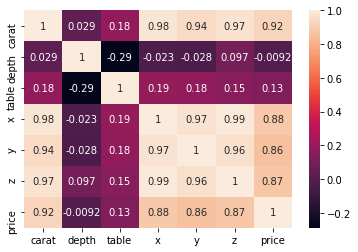

In [51]:
sns.heatmap(df.corr(), annot=True)

In [52]:
df['cut'].unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [53]:
df['color'].unique()

array(['H', 'D', 'F', 'G', 'I', 'E', 'J'], dtype=object)

In [54]:
df['clarity'].unique()

array(['VS2', 'VVS2', 'VS1', 'IF', 'SI1', 'SI2', 'VVS1', 'I1'],
      dtype=object)

In [55]:
diccionario_cut = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
df['cut'] = df['cut'].apply(lambda x: diccionario_cut[x])
diccionario_color = dict(zip(['D', 'E', 'F', 'G', 'H', 'I', 'J'], [6, 5, 4, 3, 2, 1, 0]))
df['color'] = df['color'].apply(lambda x: diccionario_color[x])
diccionario_clarity = dict(zip(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], [7, 6, 5, 4, 3, 2, 1, 0]))
df['clarity'] = df['clarity'].apply(lambda x: diccionario_clarity[x])

In [56]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.21,4,2,3,63.0,57.0,6.73,6.70,4.23,6134
1,0.28,2,6,5,64.0,56.0,4.14,4.17,2.66,532
2,0.42,3,4,4,61.2,58.0,4.86,4.82,2.96,1103
3,0.26,4,2,7,61.1,57.0,4.16,4.12,2.53,600
4,1.10,1,3,2,63.4,57.0,6.52,6.55,4.14,4997


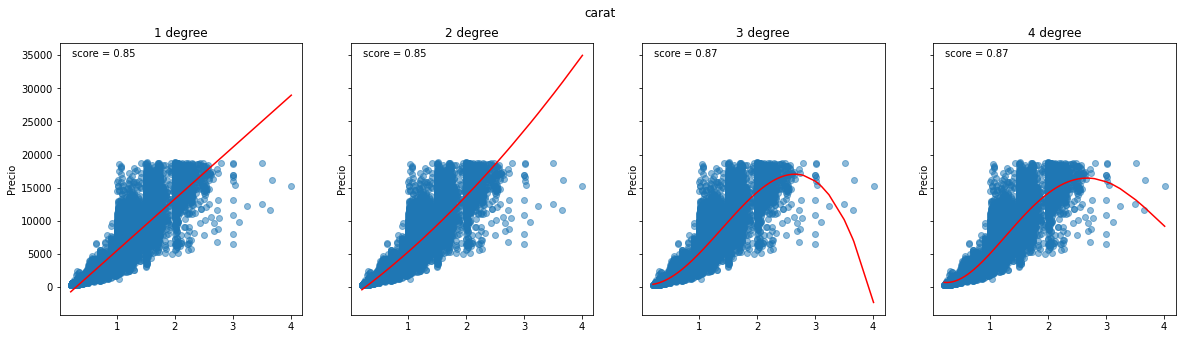

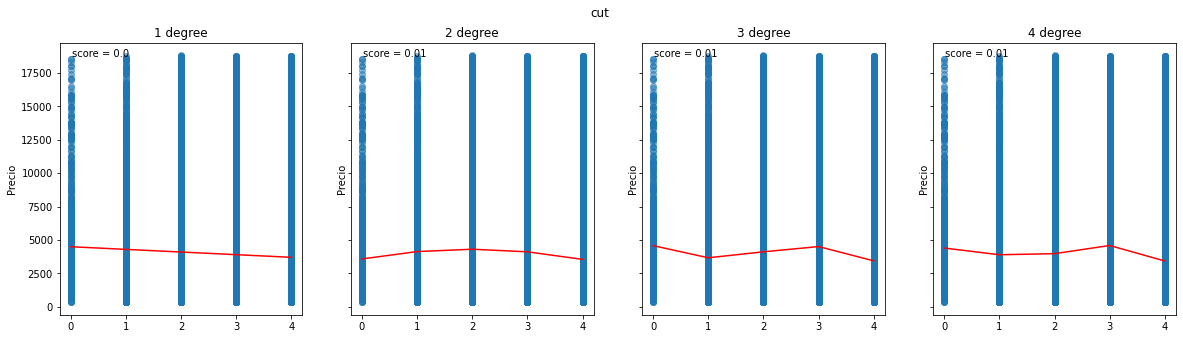

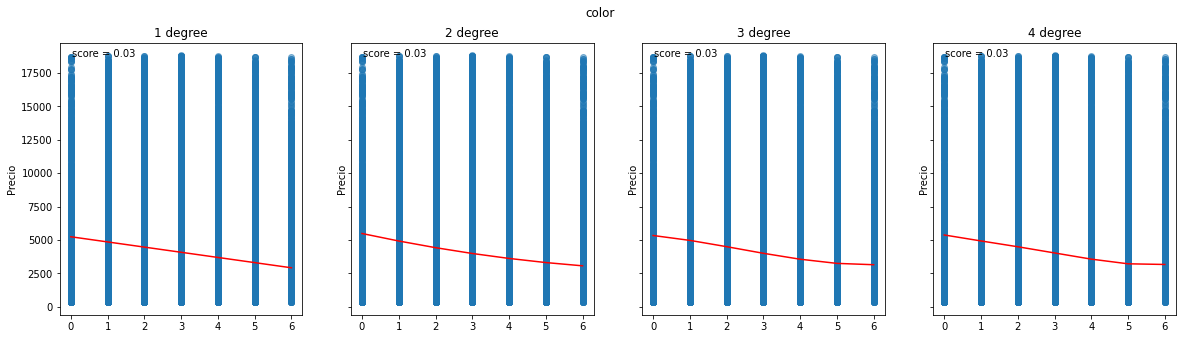

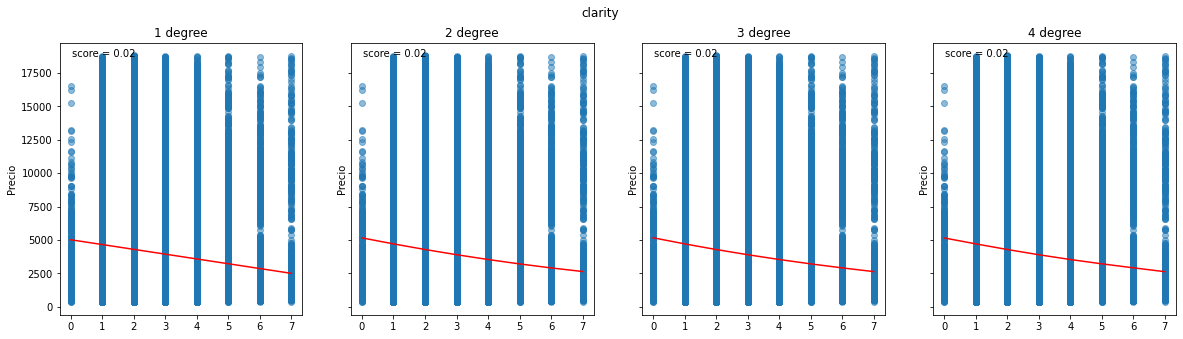

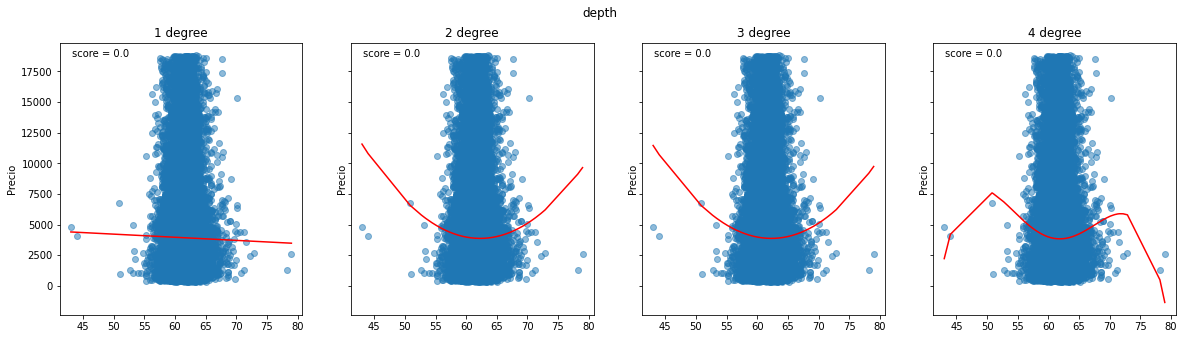

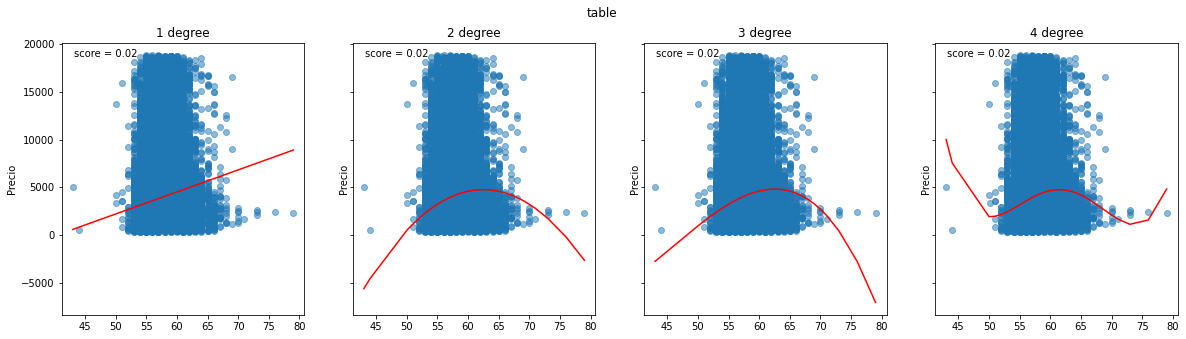

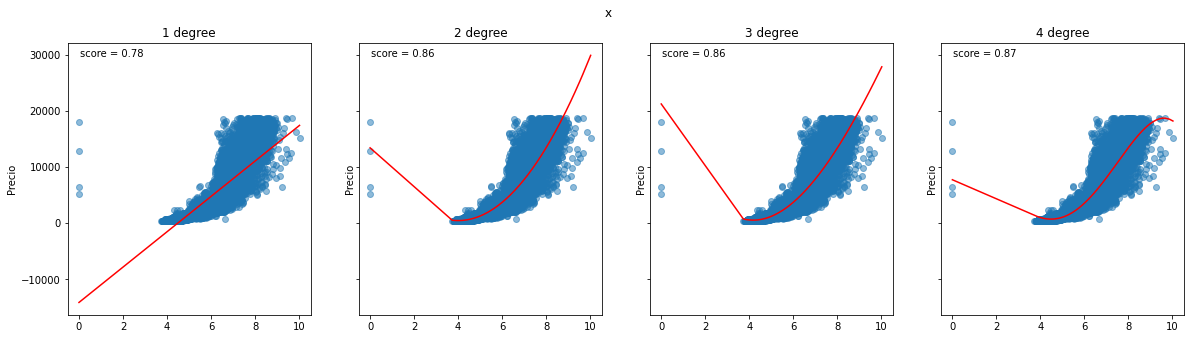

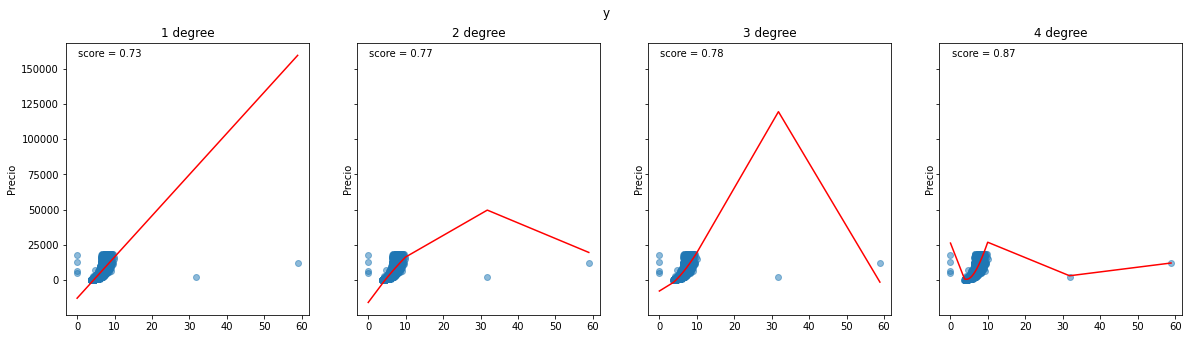

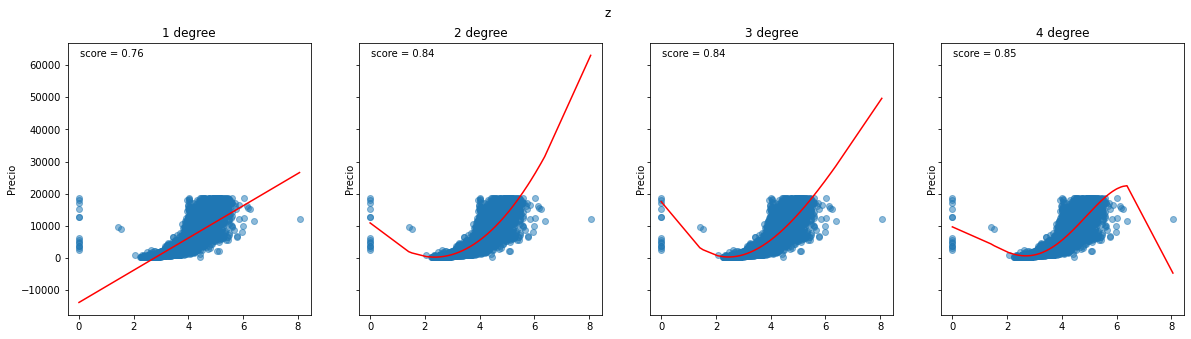

In [57]:
seed = 42
# Hacemos un gráfico por columna y grado del polinomio
for i in range(len(df.columns) - 1):
    fig, ax = plt.subplots(ncols=4, figsize=(20, 5), sharey=True)
    fig.suptitle(f'{df.columns[i]}')
    X_train, X_test, y_train, y_test = train_test_split(df[df.columns[i]].values.reshape(-1, 1), df['price'], test_size=0.2,random_state=seed)

    for k in range(1, 5):
        model = LinearRegression()
        poly_transform = PolynomialFeatures(degree=k)
        X_poly = poly_transform.fit_transform(X_train, y_train)
        model.fit(X_poly, y_train)
        X_train_show, y_train_show = zip(*(sorted(zip(X_train, model.predict(X_poly)))))
        ax[k - 1].scatter(X_train, y_train, alpha=0.5)
        ax[k - 1].plot(X_train_show, y_train_show, c='red')
        ax[k - 1].set_title(f'{k} degree')
        ax[k - 1].set_ylabel(f'Precio')
        ax[k - 1].annotate(f'score = {round(model.score(X_poly, y_train), 2)}', xy=(0.05, 0.95), xycoords='axes fraction')

In [58]:
#df = df[~(df['x'] < 2)]
#df = df[~((df['y'] < 1) | (df['y'] > 80))]
#df = df = df[~((df['z'] < 1.5) | (df['z'] > 7))]

In [59]:
df = df.drop(['depth'], axis=1)

In [60]:
target = df['price']
df = df.drop('price', axis=1)

In [61]:
df.head()

,carat,cut,color,clarity,table,x,y,z
0,1.21,4,2,3,57.0,6.73,6.70,4.23
1,0.28,2,6,5,56.0,4.14,4.17,2.66
2,0.42,3,4,4,58.0,4.86,4.82,2.96
3,0.26,4,2,7,57.0,4.16,4.12,2.53
4,1.10,1,3,2,57.0,6.52,6.55,4.14


In [62]:
scaler = RobustScaler()
df = scaler.fit_transform(df)

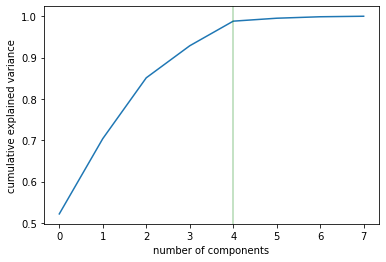

In [64]:
pca = PCA()
pca.fit(df)
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('number of components')
ax.set_ylabel('cumulative explained variance')
ax.axvline(4, c='green', alpha=0.3)

In [65]:
#------NO USADO------
#pca = PCA(n_components=4)
#df = pca.fit_transform(df)

Hacemos todas las transformaciones con el de predicción

In [66]:
df_pred = pd.read_csv("diamonds_test.csv", index_col=0)

In [67]:
df_pred.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56
3,0.31,Ideal,H,VS2,61.8,57.0,4.32,4.36,2.68
4,1.51,Good,I,VVS1,64.0,60.0,7.26,7.21,4.63


In [68]:
df_pred = df_pred.drop(['depth'], axis=1)
df_pred['cut'] = df_pred['cut'].apply(lambda x: diccionario_cut[x])
df_pred['color'] = df_pred['color'].apply(lambda x: diccionario_color[x])
df_pred['clarity'] = df_pred['clarity'].apply(lambda x: diccionario_clarity[x])
df_pred = scaler.transform(df_pred)
#df_pred = pca.transform(df_pred) #--> No hacemos esta tranformación

Modelo

In [69]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(df, target.values.reshape(-1, 1), test_size=0.2, random_state=seed) 

In [70]:
nnc = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(1250,), alpha=1e-05, learning_rate='constant', solver='lbfgs', 
max_iter=1000, tol=1e-6, verbose=True)
nnc.fit(X_train, y_train)
mean_squared_error(y_test, nnc.predict(X_test), squared=False)

In [71]:
nnc = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(1200,), alpha=1e-05, learning_rate='constant', solver='lbfgs', 
max_iter=1200, tol=1e-6, verbose=True)
nnc.fit(df, target)

/home/jose/.local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=1e-05, hidden_layer_sizes=(1250,), max_iter=1200,
             solver='lbfgs', tol=1e-06, verbose=True)

In [72]:
mean_squared_error(target, nnc.predict(df), squared=False)

481.71146570193946

## Predicción 

### 2. Carga los datos de `diamonds_test.csv` para predecir.

**¿De dónde saco `diamonds_test.csv`?**

In [73]:
predictions_submit = nnc.predict(df_pred)
predictions_submit

array([  430.41449703,  2055.71014823,  9351.1546489 , ...,
       14839.33700469,  9252.94582184,   695.28571303])

In [74]:
predictions_submit.shape

(13449,)

In [75]:
sample = pd.read_csv("sample_submission.csv")

In [76]:
sample.head()

,id,price
0,0,12132
1,1,11786
2,2,14684
3,3,15425
4,4,6724


In [77]:
sample.shape

(13449, 2)

In [78]:
submission = pd.DataFrame({"id": range(len(predictions_submit)), "price": predictions_submit})

In [79]:
submission.head()

,id,price
0,0,430.414497
1,1,2055.710148
2,2,9351.154649
3,3,490.832082
4,4,10256.094880


In [80]:
submission.shape

(13449, 2)

In [81]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("./submission.csv", index = False)     
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Clara: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `diamonds_test.csv`. Lloro.")


In [82]:
chequeator(submission)

You're ready to submit!


In [ ]:
# import pickle
#
# pickle.dump(nnc, open('modelo.p', 'wb'))